In [4]:
import torch
import sys  
import os 
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent))


from models.deeplabv3_model import DeepLabV3

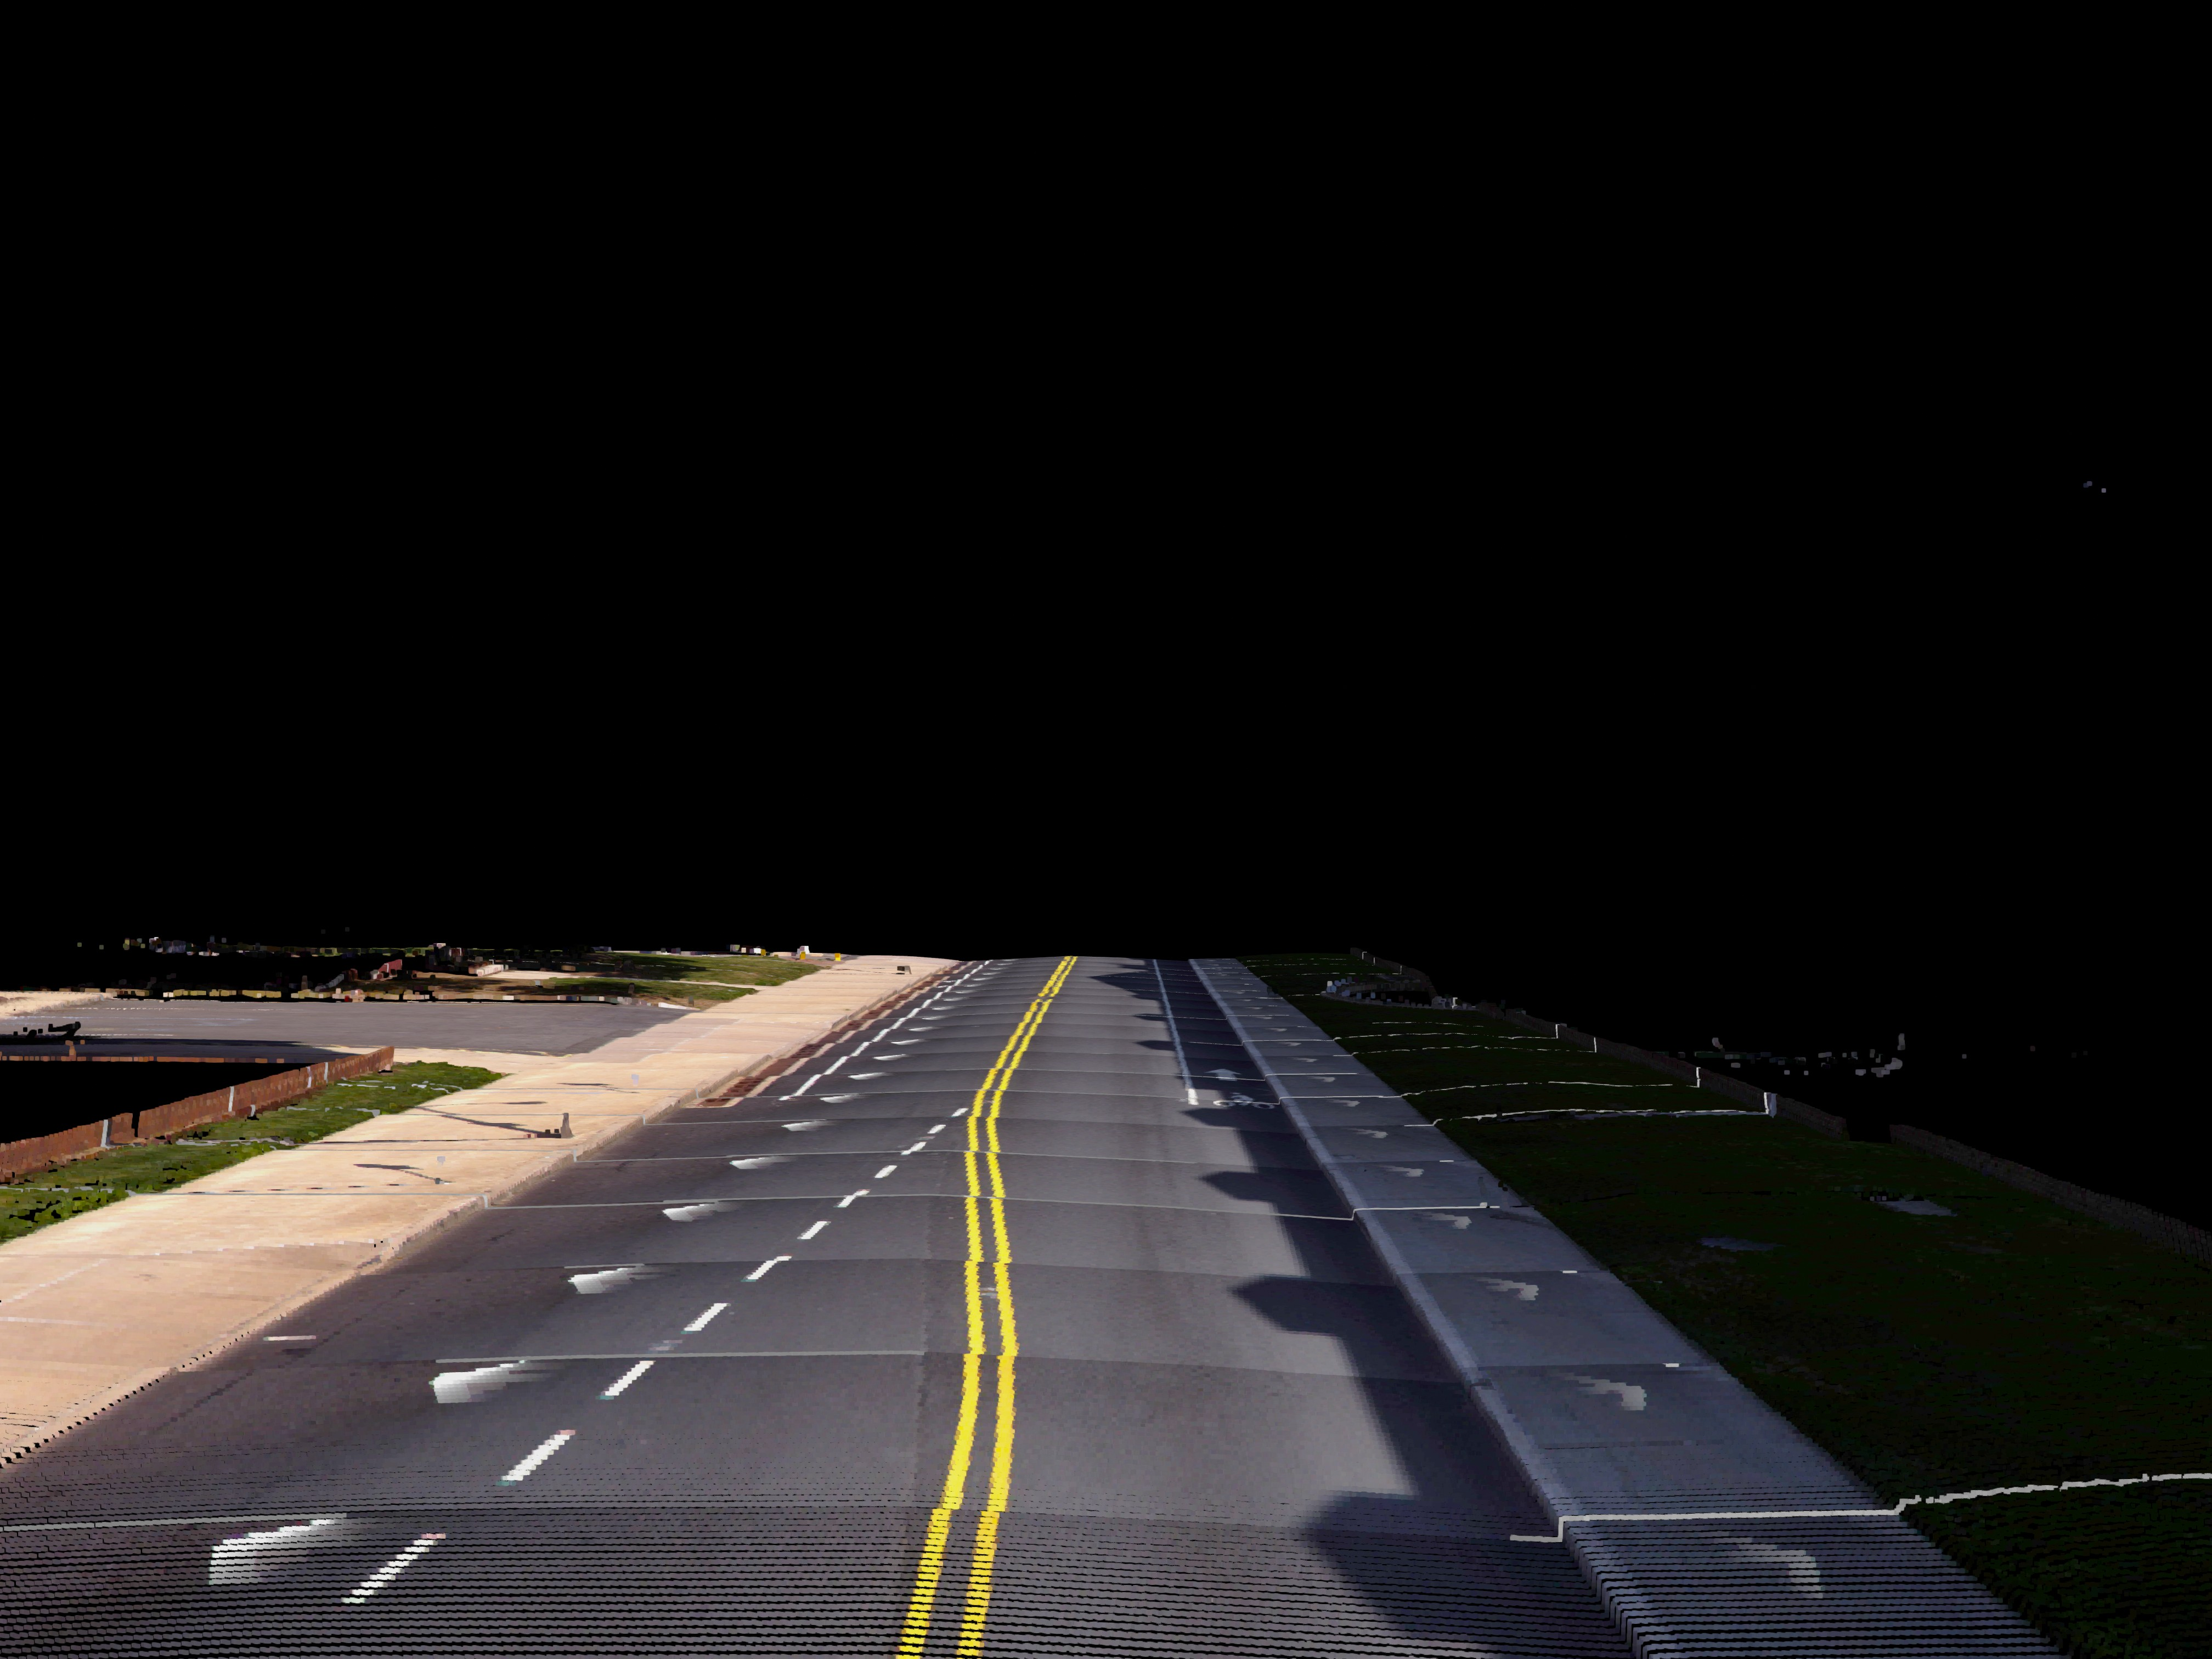

In [6]:
from PIL import Image


test_img_path = "../data/sidewalk/JPEGImages/0711p2.part12.street13b.jpg"

test_img = Image.open(test_img_path)
test_img

In [7]:
model = DeepLabV3.load_from_checkpoint("../checkpoint/sidewalk_deeplabv3_v1/last.ckpt")

In [13]:
from torchvision.transforms import transforms as T

transform = T.Compose([T.Resize((512, 512)), T.ToTensor()])
device = "cuda" if torch.cuda.is_available() else "cpu"

img_tensor = transform(test_img).to(device)
b_img_tensor = img_tensor.unsqueeze(0)

img_tensor.shape, b_img_tensor.shape, img_tensor.device, b_img_tensor.device

(torch.Size([3, 512, 512]),
 torch.Size([1, 3, 512, 512]),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [15]:
model.eval()
output = model(b_img_tensor)
out = output['out']
out.shape

torch.Size([1, 3, 512, 512])

In [21]:
import json

json_file = "../data/sidewalk/label_info.json"

with open(json_file, "r") as f:
    label_info = json.load(f)

len(label_info['label_to_id'])

25